In [66]:
from numpy import * 
from qiskit import *

In [67]:
#Create a quantum circuit with 2 qubits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)
#Add a Hadamard gate on qubit 0
qc.h(0)
#Add a CNOT gate 
qc.cx(0,1)

#Measure the qbits
qc.measure([0,1], [0,1])

# Draw the circuit

print(qc)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [68]:
#SETUP THE BACKEND AND TRANSPILER
#Importing the simulator
from qiskit_aer import QasmSimulator


In [69]:
backend = QasmSimulator()

#Importing the translator
from qiskit import transpile
#Compile the circuit so that the backend understands 
qc_bin = transpile(qc, backend=backend)

#Execution
#Execute the circuit on the qasm simulator
qc_job = backend.run(qc_bin, shots=10000)

In [70]:
from qiskit.providers.jobstatus import JobStatus
print(qc_job.status())

JobStatus.DONE


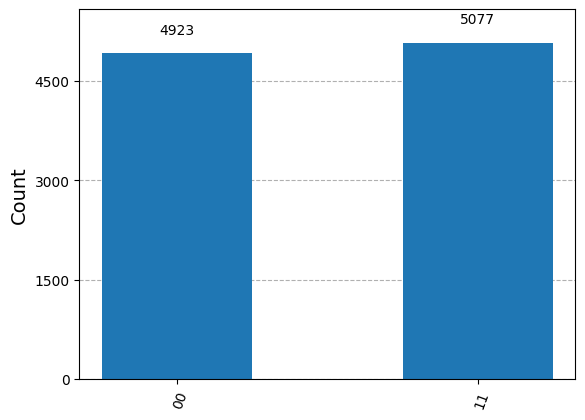

In [71]:
#Grab results from the job
qc_result = qc_job.result()
#LOADING AND VISUALIZING THE RESULTS
from qiskit.visualization import plot_histogram
#Plot the results
qc_counts = qc_result.get_counts(qc_bin)
plot_histogram(qc_counts)

Deutsch Algo

In [72]:
qr = QuantumRegister(4, 'q')
qc = QuantumCircuit(qr, cr)
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
print(qc)

                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘
c: 2/═══════════════
                    


In [73]:
from numpy import * 
from random import randint
from qiskit import *
from qiskit.providers.jobstatus import JobStatus 
from qiskit.visualization import plot_histogram
from qiskit_aer import QasmSimulator

backend = QasmSimulator()



In [74]:
def DeutschJosza(n, oracle):
    qr = QuantumRegister(n+1, name = 'q')
    cr = ClassicalRegister(n, name = 'c')
    qc = QuantumCircuit(qr, cr)
    qc.x(n)
    qc.h(n)
    qc.h(range(n))
    qc.append(oracle, range(n+1))
    qc.h(range(n))
    qc.measure(range(n), range(n))
    print(qc)

In [75]:
def constant_oracle(n):
    qc = QuantumCircuit(n+1, name = 'oracle')
    print("The oracle: \n")
    print(qc)
    return qc.to_instruction()

In [76]:
def balanced_oracle(n):
    qc = QuantumCircuit(n+1, name = 'oracle')
    b = randint(0, 2**n-1)
    for i in range(n):
        qc.cx(i, n)
    print("The oracle: \n")
    print(qc)
    return qc.to_instruction()  

In [77]:
DeutschJosza(3, constant_oracle(3))

The oracle: 

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
     ┌───┐     ┌─────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├──────
     ├───┤     │         │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├───
     ├───┤     │  oracle │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3        ├──────╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 


In [78]:
n = 3
#Flipping coin to choose oracle
coin=randint(0,1)
if coin == 0:
    oracle = constant_oracle(n)
else:
    oracle = balanced_oracle(n)
#Constructing the Deutsch-Josza circuit
qc = DeutschJosza(n, oracle)
print("The Deursch-Josza circuit: \n") 
print(qc)
#Run 
qc_bin = transpile(qc, backend=backend)
qc_job = backend.run(qc_bin, shots=10000)
qc_result = qc_job.result()
print("Result counts: ")
display(qc_job.result().get_counts())
if coin == 0:
    print("The oracle is constant")
else: 
    print("The oracle is balanced") 

The oracle: 



     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
     ┌───┐     ┌─────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├──────
     ├───┤     │         │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├───
     ├───┤     │  oracle │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3        ├──────╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
The Deursch-Josza circuit: 

None


AttributeError: 'NoneType' object has no attribute 'name'

Grover